# 유방암 데이터
- 10, 5, 2 차원으로 차원축소
- 원본과 차원축소한 데이터의 분류 정확도 측정
- 2차원으로 축소한 것은 시각화
- 군집화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- 유방암 데이터 셋 활용

In [2]:
from sklearn.datasets import load_breast_cancer
brc = load_breast_cancer()

In [3]:
#정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
brc_std = scaler.fit_transform(brc.data)

- 10차원으로 차원 축소

In [32]:
pca_10 = PCA(n_components=10)
brc_pca_10 = pca_10.fit_transform(brc_std)
brc_10_df = pd.DataFrame(brc_pca_10, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
brc_10_df['target'] = brc.target
brc_10_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159370,-0.398402,-0.157132,-0.877425,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240987,-0.711902,1.107001,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668163,0.097389,0.024029,0.454205,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429914,1.059578,-1.405469,-1.117033,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936215,0.636368,-0.263785,0.377743,0


- 5차원으로 차원 축소

In [33]:
pca_5 = PCA(n_components=5)
brc_pca_5 = pca_5.fit_transform(brc_std)
brc_5_df = pd.DataFrame(brc_pca_5, columns=['PC1','PC2','PC3','PC4','PC5'])
brc_5_df['target'] = brc.target
brc_5_df.head()

,PC1,PC2,PC3,PC4,PC5,target
0,9.192837,1.948583,-1.123166,3.633732,-1.195111,0
1,2.387802,-3.768172,-0.529293,1.118263,0.621776,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177087,0
3,7.122953,10.275589,-3.232790,0.152548,-2.960879,0
4,3.935302,-1.948072,1.389767,2.940639,0.546748,0


- 2차원으로 차원 축소

In [5]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
brc_pca_2 = pca_2.fit_transform(brc_std)
brc_2_df = pd.DataFrame(brc_pca_2, columns=['PC1','PC2'])
brc_2_df['target'] = brc.target
brc_2_df.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [38]:
 # 설명력 확인
pca_10.explained_variance_ratio_    
pca_5.explained_variance_ratio_     
pca_2.explained_variance_ratio_   

array([0.44272026, 0.18971182])

- 2차원 축소 시각화

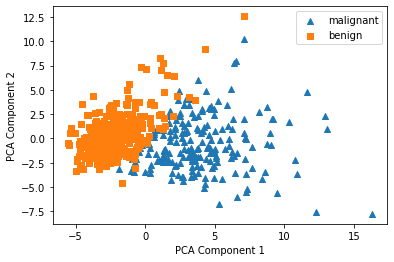

In [15]:
markers = ['^', 's']

for i, marker in enumerate(markers):
    x_axis_data = brc_df[brc_df.target == i]['PC1']
    y_axis_data = brc_df[brc_df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=brc.target_names[i])
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### PCA 전후 분류 비교

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

- 원본 데이터로 분류

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    brc.data, brc.target, stratify=brc.target, random_state=2021
)

In [9]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9090909090909091

- PCA 데이터로 분류

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    brc_pca, brc.target, stratify=brc.target, random_state=2021
)

In [11]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.916083916083916

- 군집화

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [17]:
kmeans.fit(brc_std)
kmeans.labels_

array([2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [40]:
brc_df['target'] = brc.target
brc_df['cluster'] = kmeans.labels_
brc_df.tail()

,PC1,PC2,target,cluster
564,6.439315,-3.576817,0,2
565,3.793382,-3.584048,0,2
566,1.256179,-1.902297,0,1
567,10.374794,1.672010,0,2
568,-5.475243,-0.670637,1,1


In [19]:
clustering_result = brc_df.groupby(['target','cluster']).count()
clustering_result

PC1  PC2
target cluster          
0      0         64   64
       1         38   38
       2        110  110
1      0         36   36
       1        321  321

- 군집화한것을 시각화

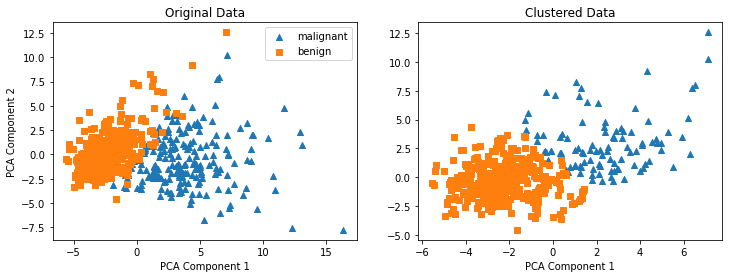

In [21]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = brc_df[brc_df[column] == i]['PC1']
        y_axis_data = brc_df[brc_df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                   label=brc.target_names[i])

    if k==0:    # target인 경우
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else:       # cluster인 경우
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')

### globals() 활용하기
- 전역 변수를 딕셔너리에 담아두기

In [1]:
for dim in [2,5,10]:
    globals()[f'pca{dim}'] = PCA(n_components=dim)
    globals()[f'cancerPCA{dim}'] = globals()f['pca{dim}'].fit_transform(cancer_std)
    acc = pca_accuracy(globals()[f'cancerPCA{dim}'], cancer.target)
    print(f'PCA{dim} 정확도: {acc}')
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

SyntaxError: invalid syntax (<ipython-input-1-7b2efe30a121>, line 3)